In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from cemba_data.tools.integration.utilities import calculate_direct_confusion
from ALLCools.plot import *
from ALLCools.plot.color import plot_colorbar
import xarray as xr

In [3]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

In [5]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

## Cell Meta

In [4]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Integration result

In [6]:
mc_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithRNA/Cortex_HPF_Inh/Integration/mc_cell_tidy_data.with_integration_info.msg'
)

rna_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithRNA/Cortex_HPF_Inh/Integration/rna_cell_tidy_data.with_integration_info.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
rna_sub_type_palette = rna_integration_data.set_index('SubType')['cluster_color'].drop_duplicates().to_dict()

## mC

In [15]:
mc_integration_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'aggumap_0', 'aggumap_1', 'aggpca_0',
       'aggpca_1', 'aggtsne_0', 'aggtsne_1', 'co_cluster'],
      dtype='object')

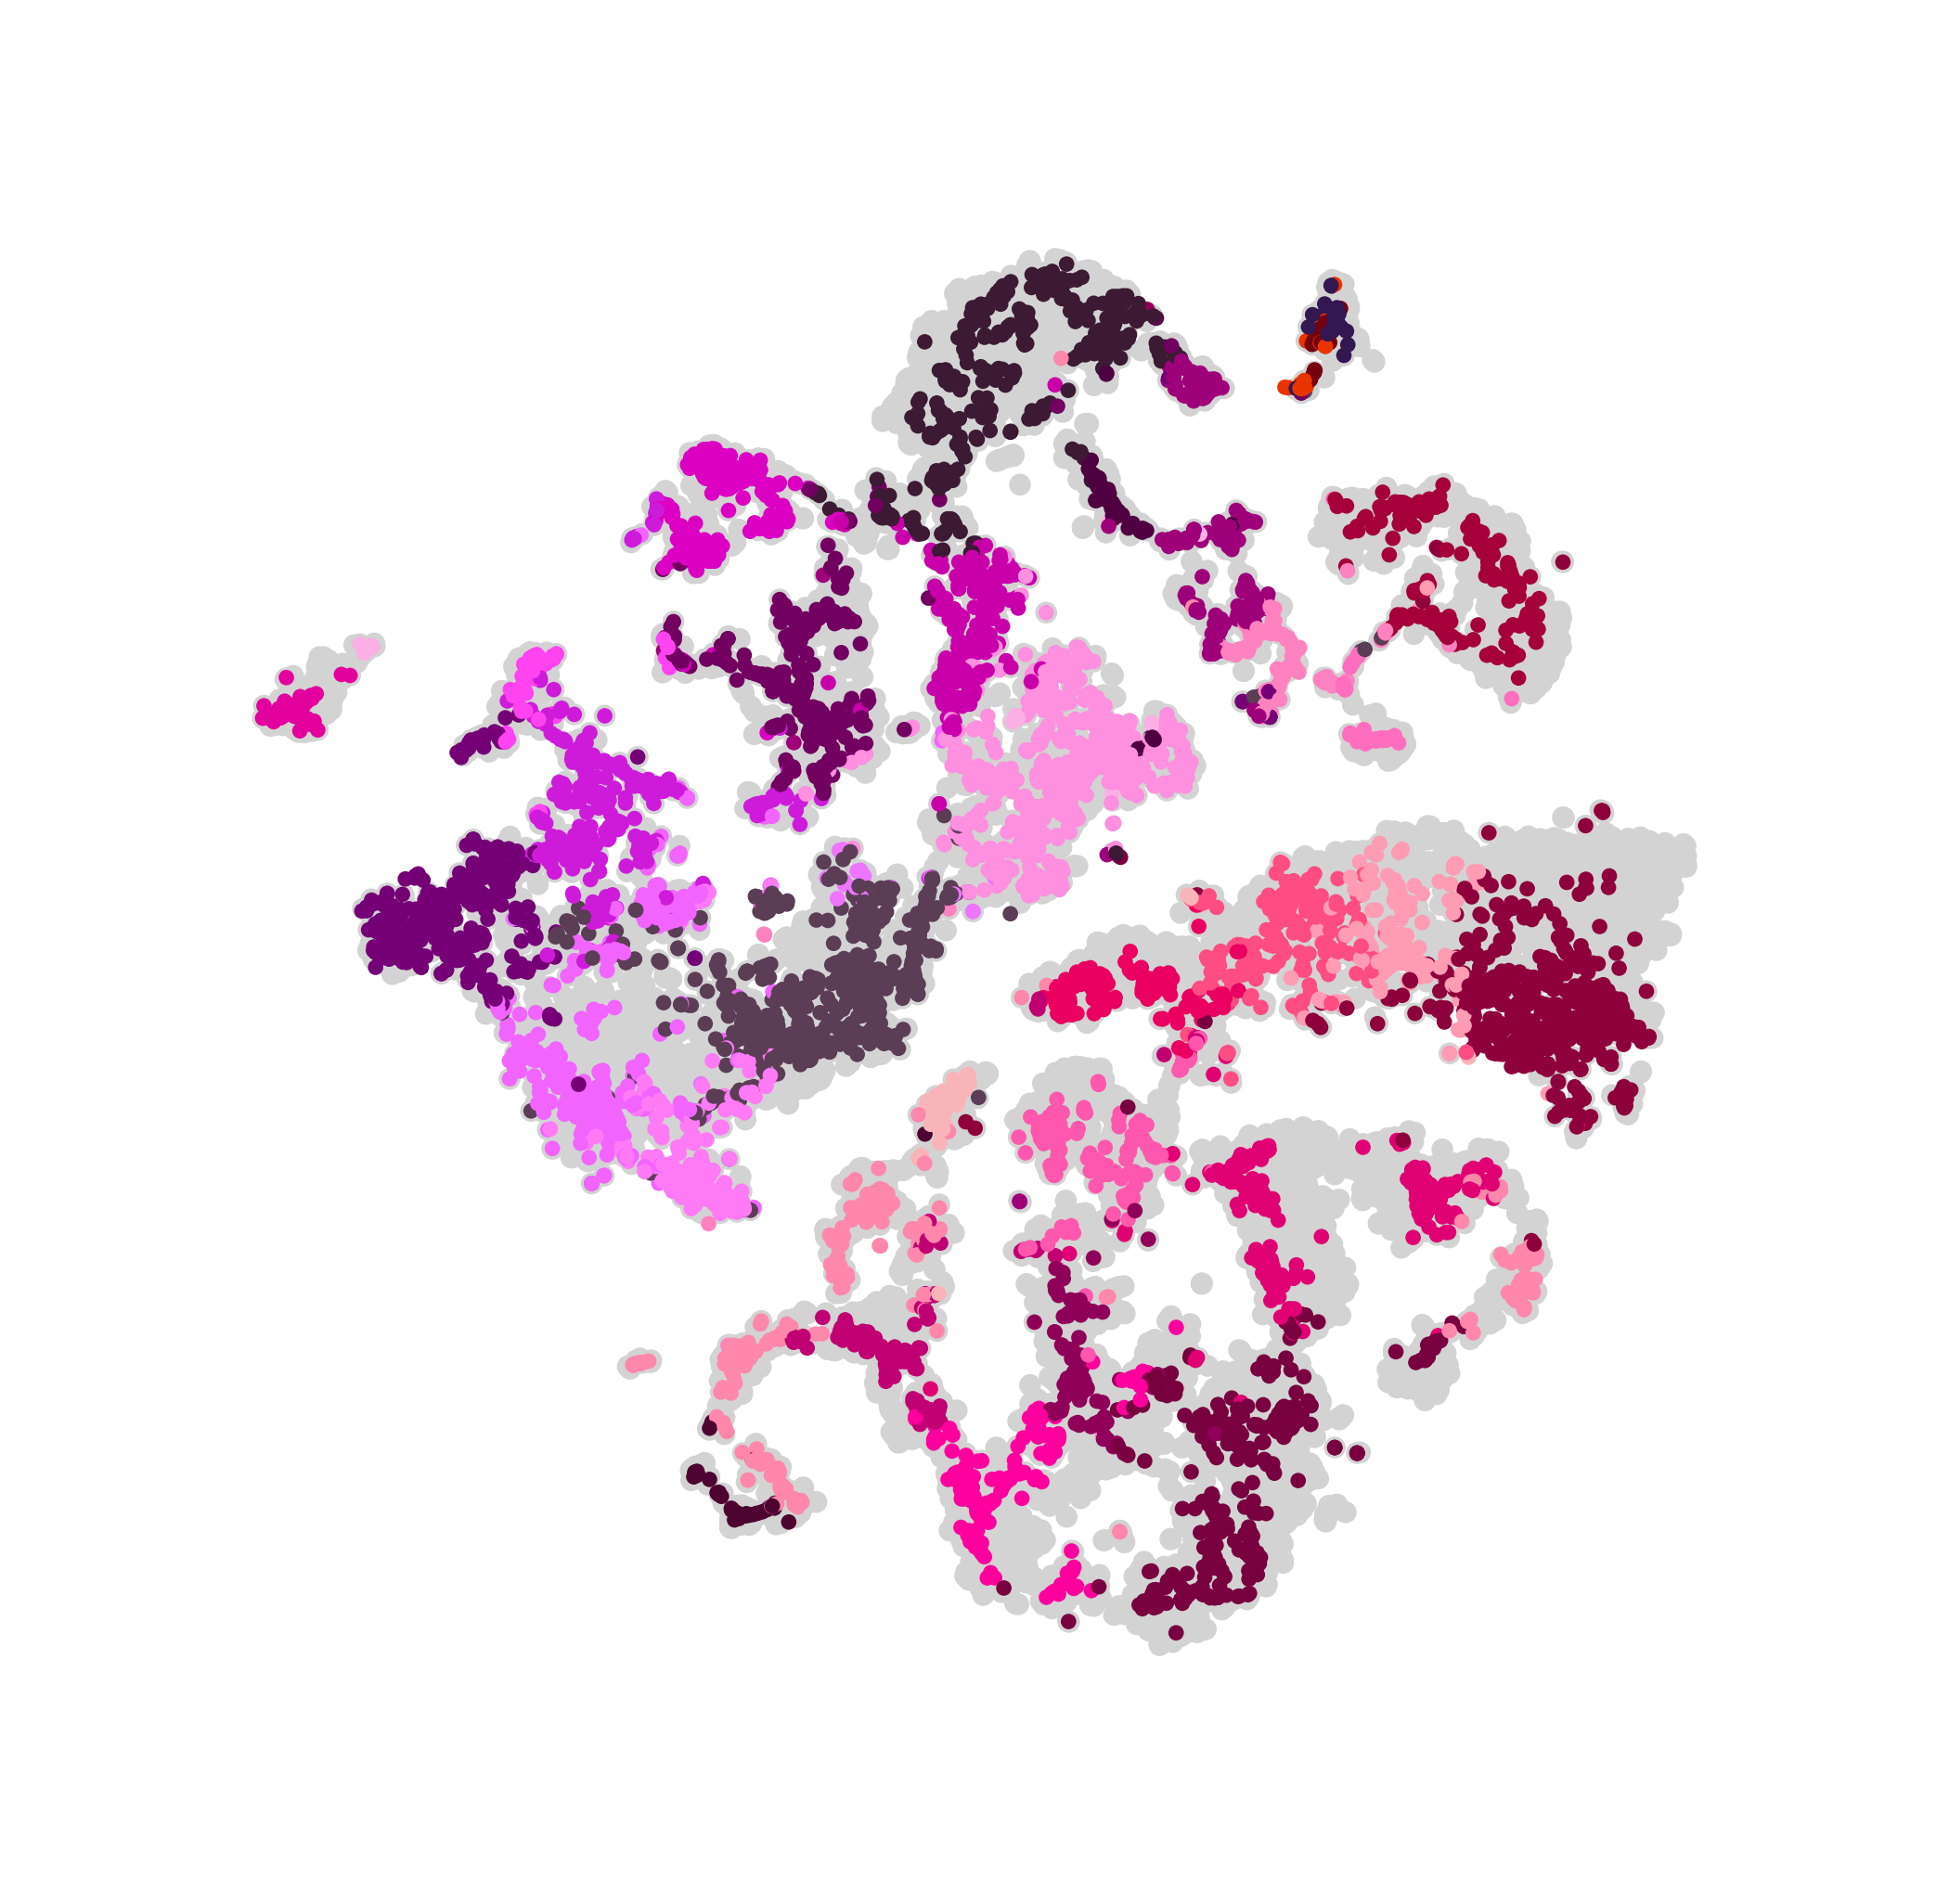

In [37]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=rna_integration_data,
                    coord_base='aggtsne',
                    s=2,
                    axis_format=None,
                    max_points=None,
                    scatter_kws=dict(color='lightgray'),
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggtsne',
                    hue='SubType',
                    palette=sub_type_palette,
                    s=1,
                    axis_format=None,
                    max_points=None,
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

#add_ax_box(ax, linewidth=0.5)
fig.savefig('TSNE-Inh-Integration.mC.color_by_subtype.scatter_part.png')
pass

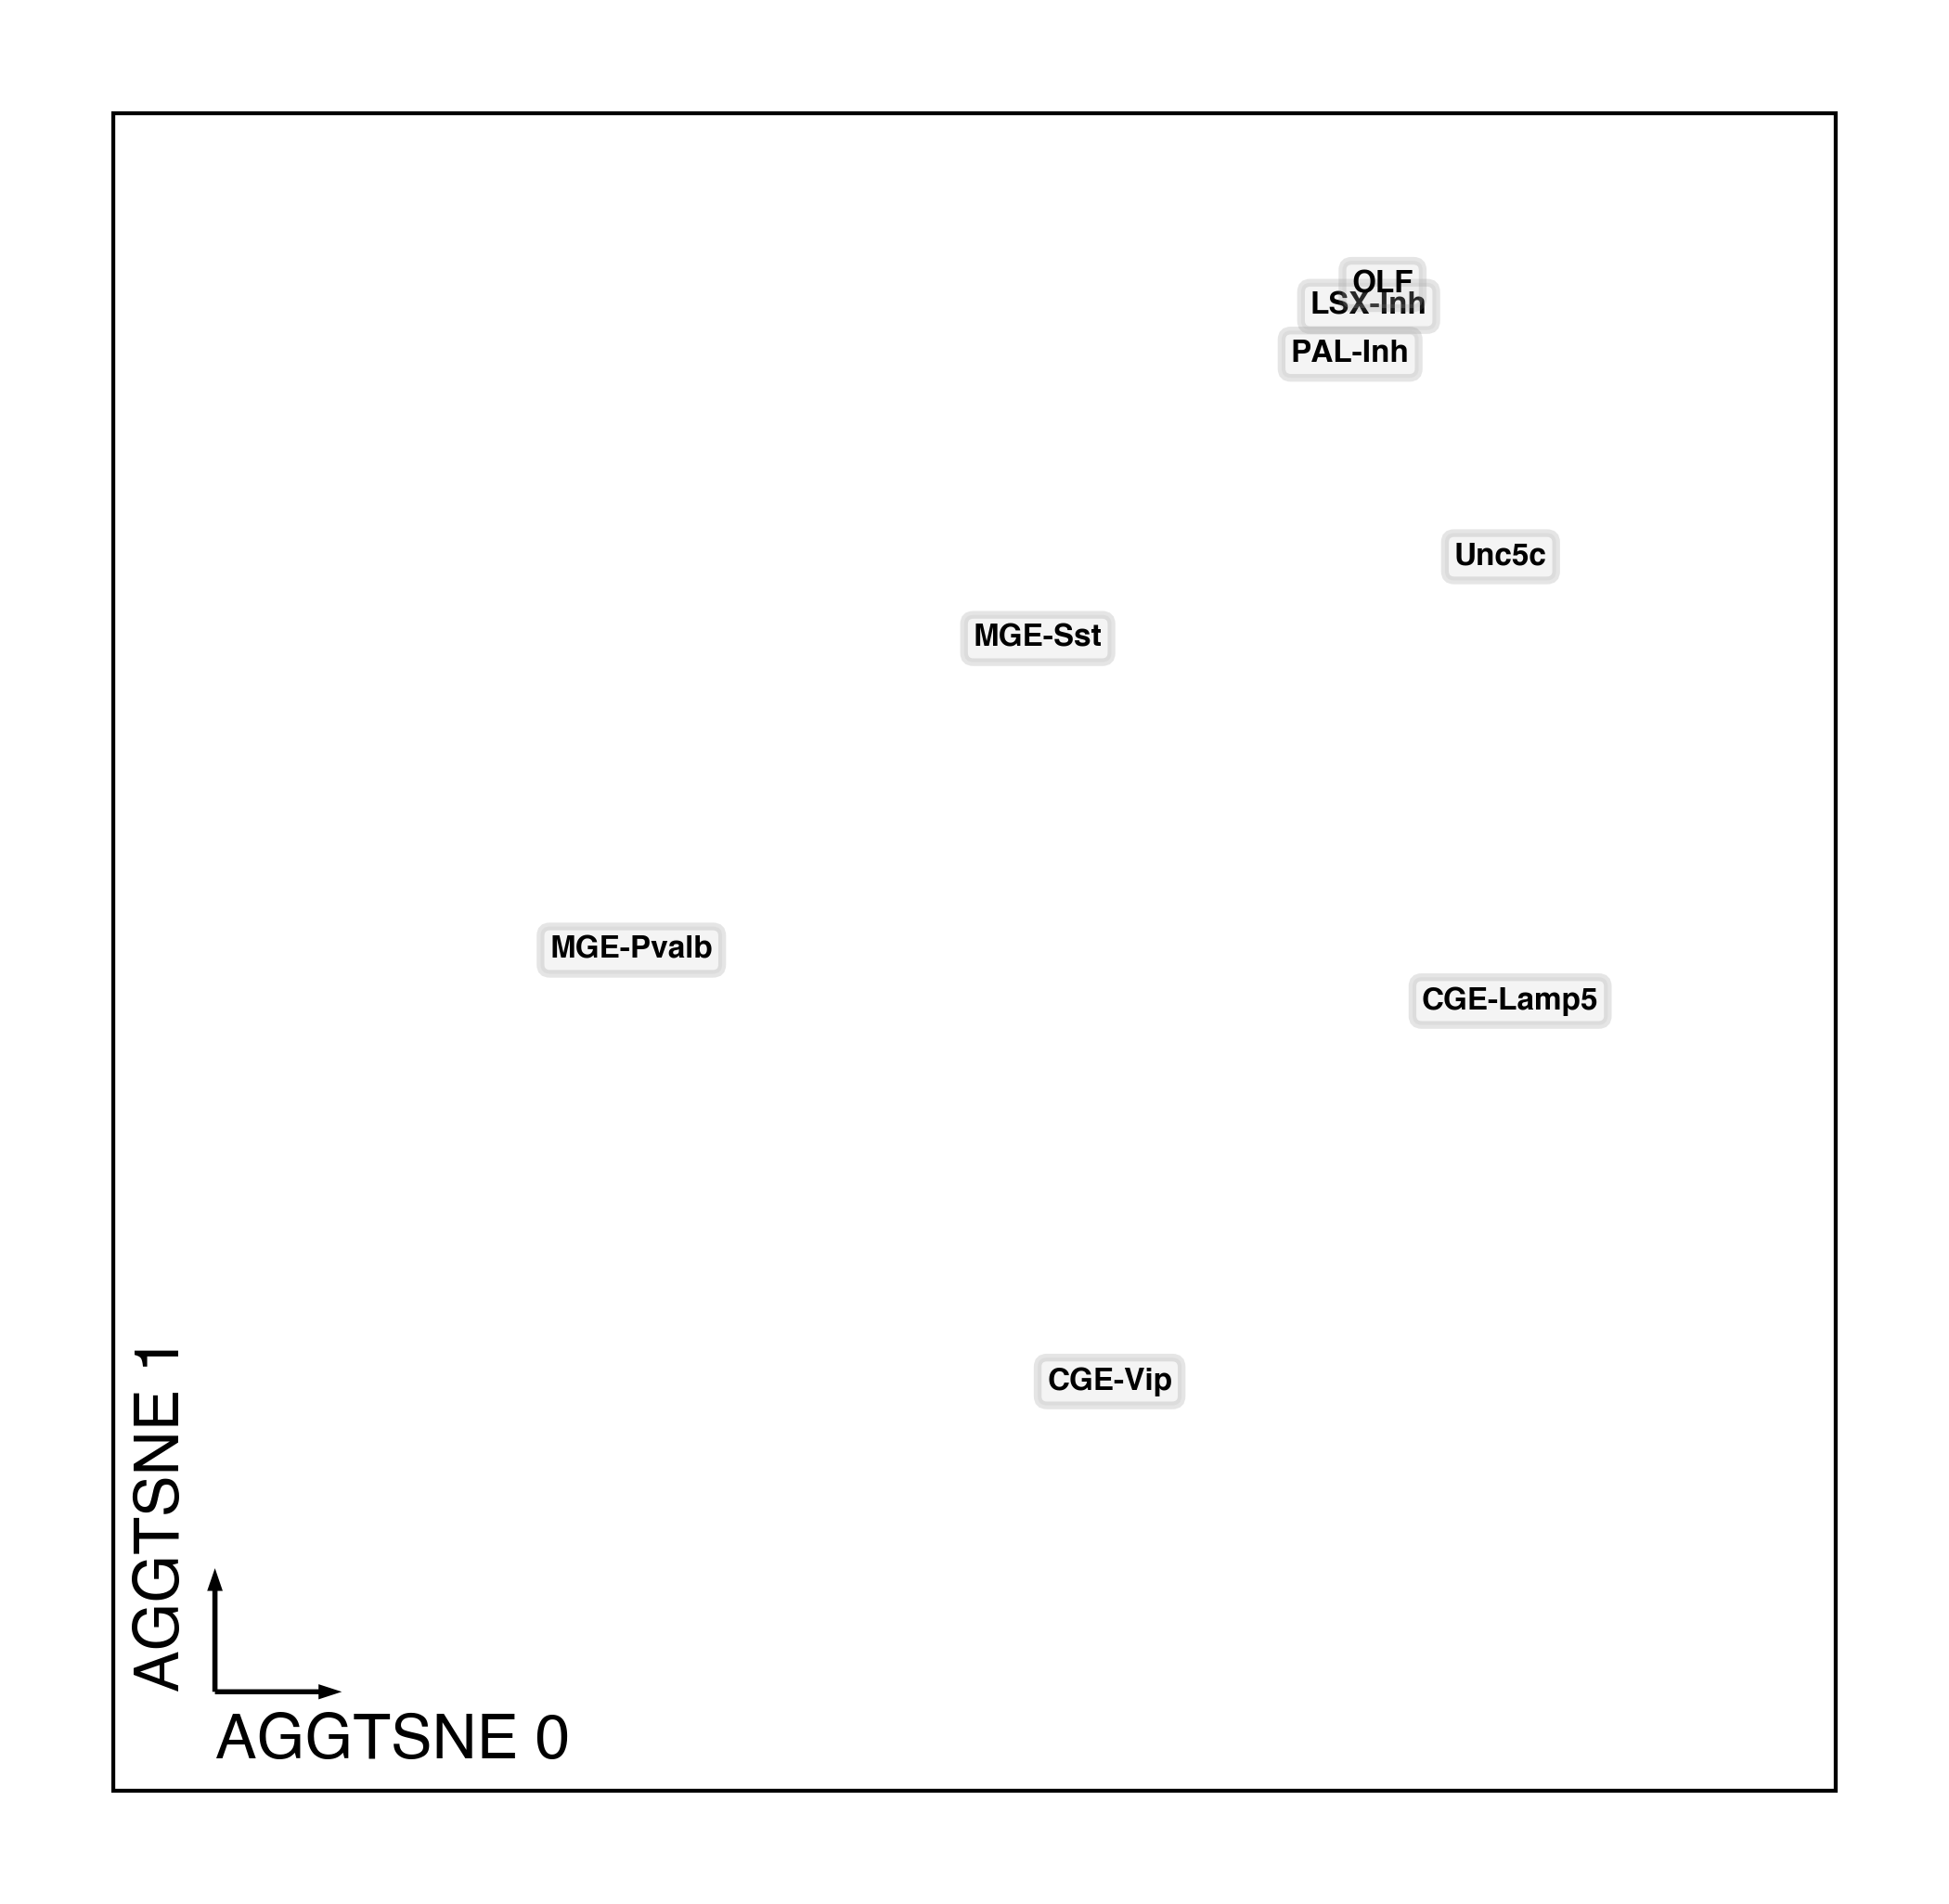

In [35]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggtsne',
                    s=0.8,
                    # axis_format=None,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig('TSNE-Inh-Integration.mC.color_by_subtype.label_part.pdf')
pass

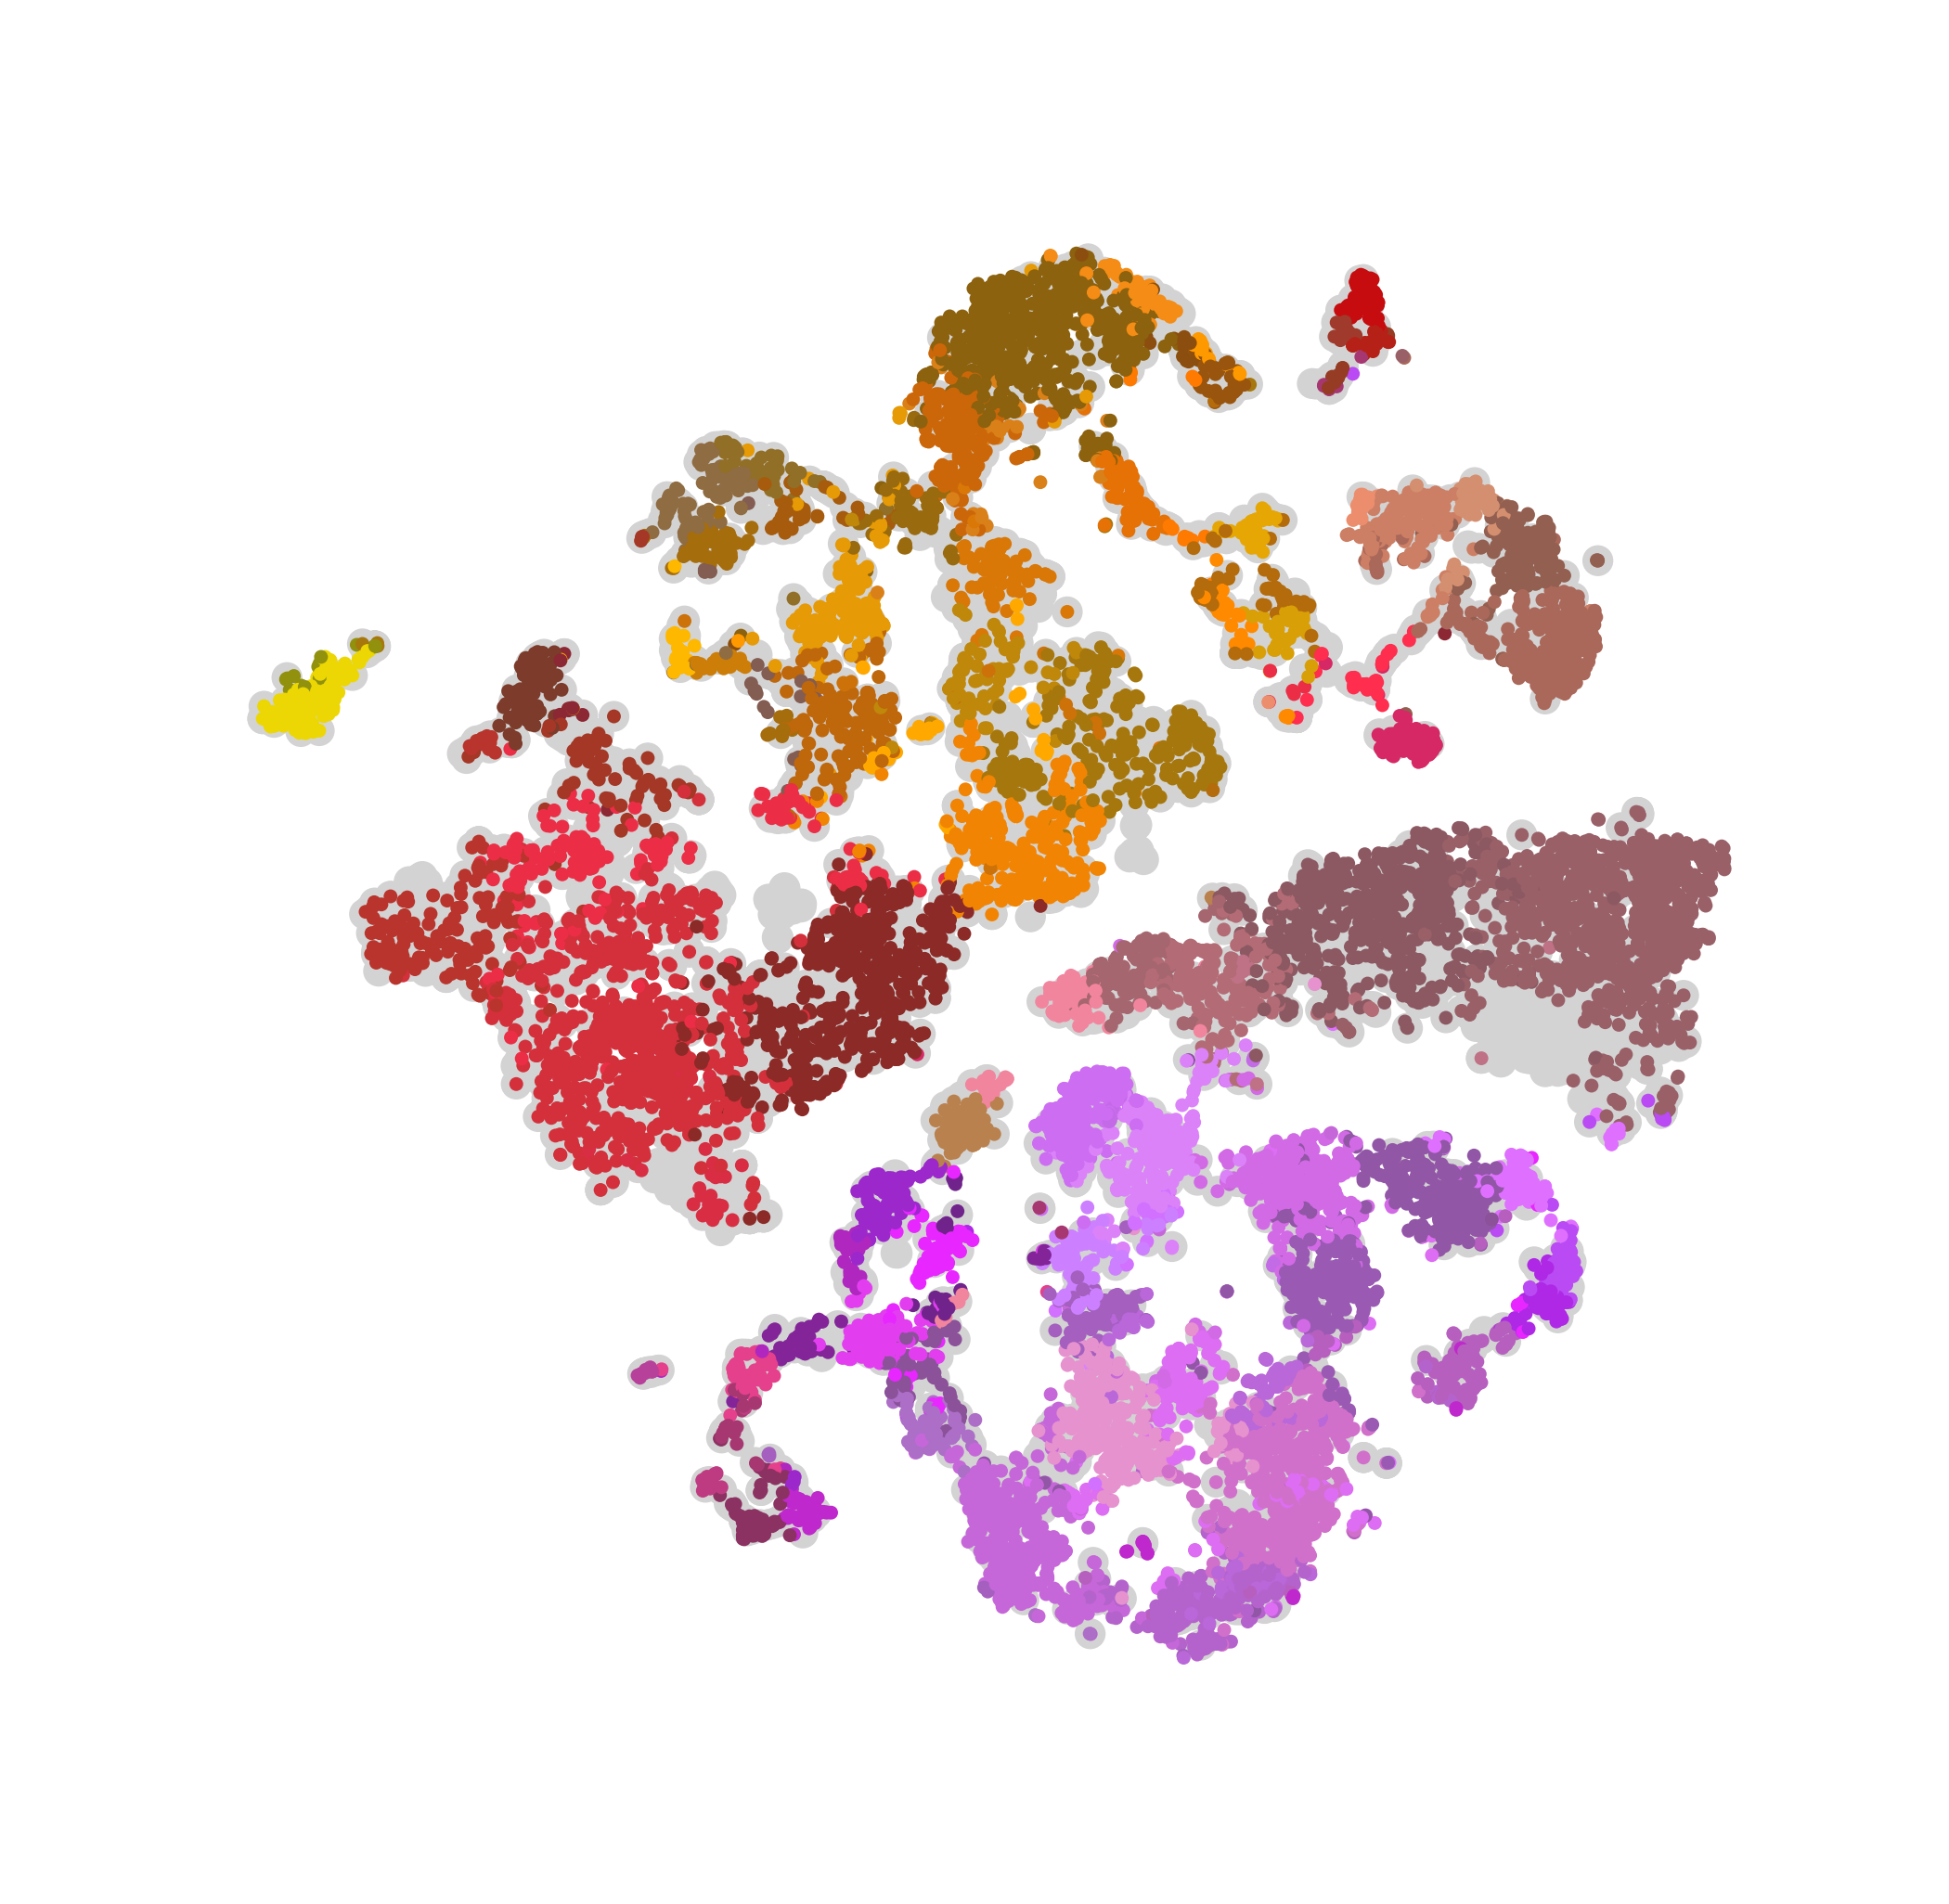

In [28]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggtsne',
                    s=4,
                    axis_format=None,
                    max_points=None,
                    scatter_kws=dict(color='lightgray'),
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

categorical_scatter(ax=ax,
                    data=rna_integration_data,
                    coord_base='aggtsne',
                    hue='SubType',
                    palette=rna_sub_type_palette,
                    s=0.8,
                    axis_format=None,
                    max_points=None,
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

#add_ax_box(ax, linewidth=0.5)
fig.savefig('TSNE-Inh-Integration.RNA.color_by_subtype.scatter_part.png')
pass

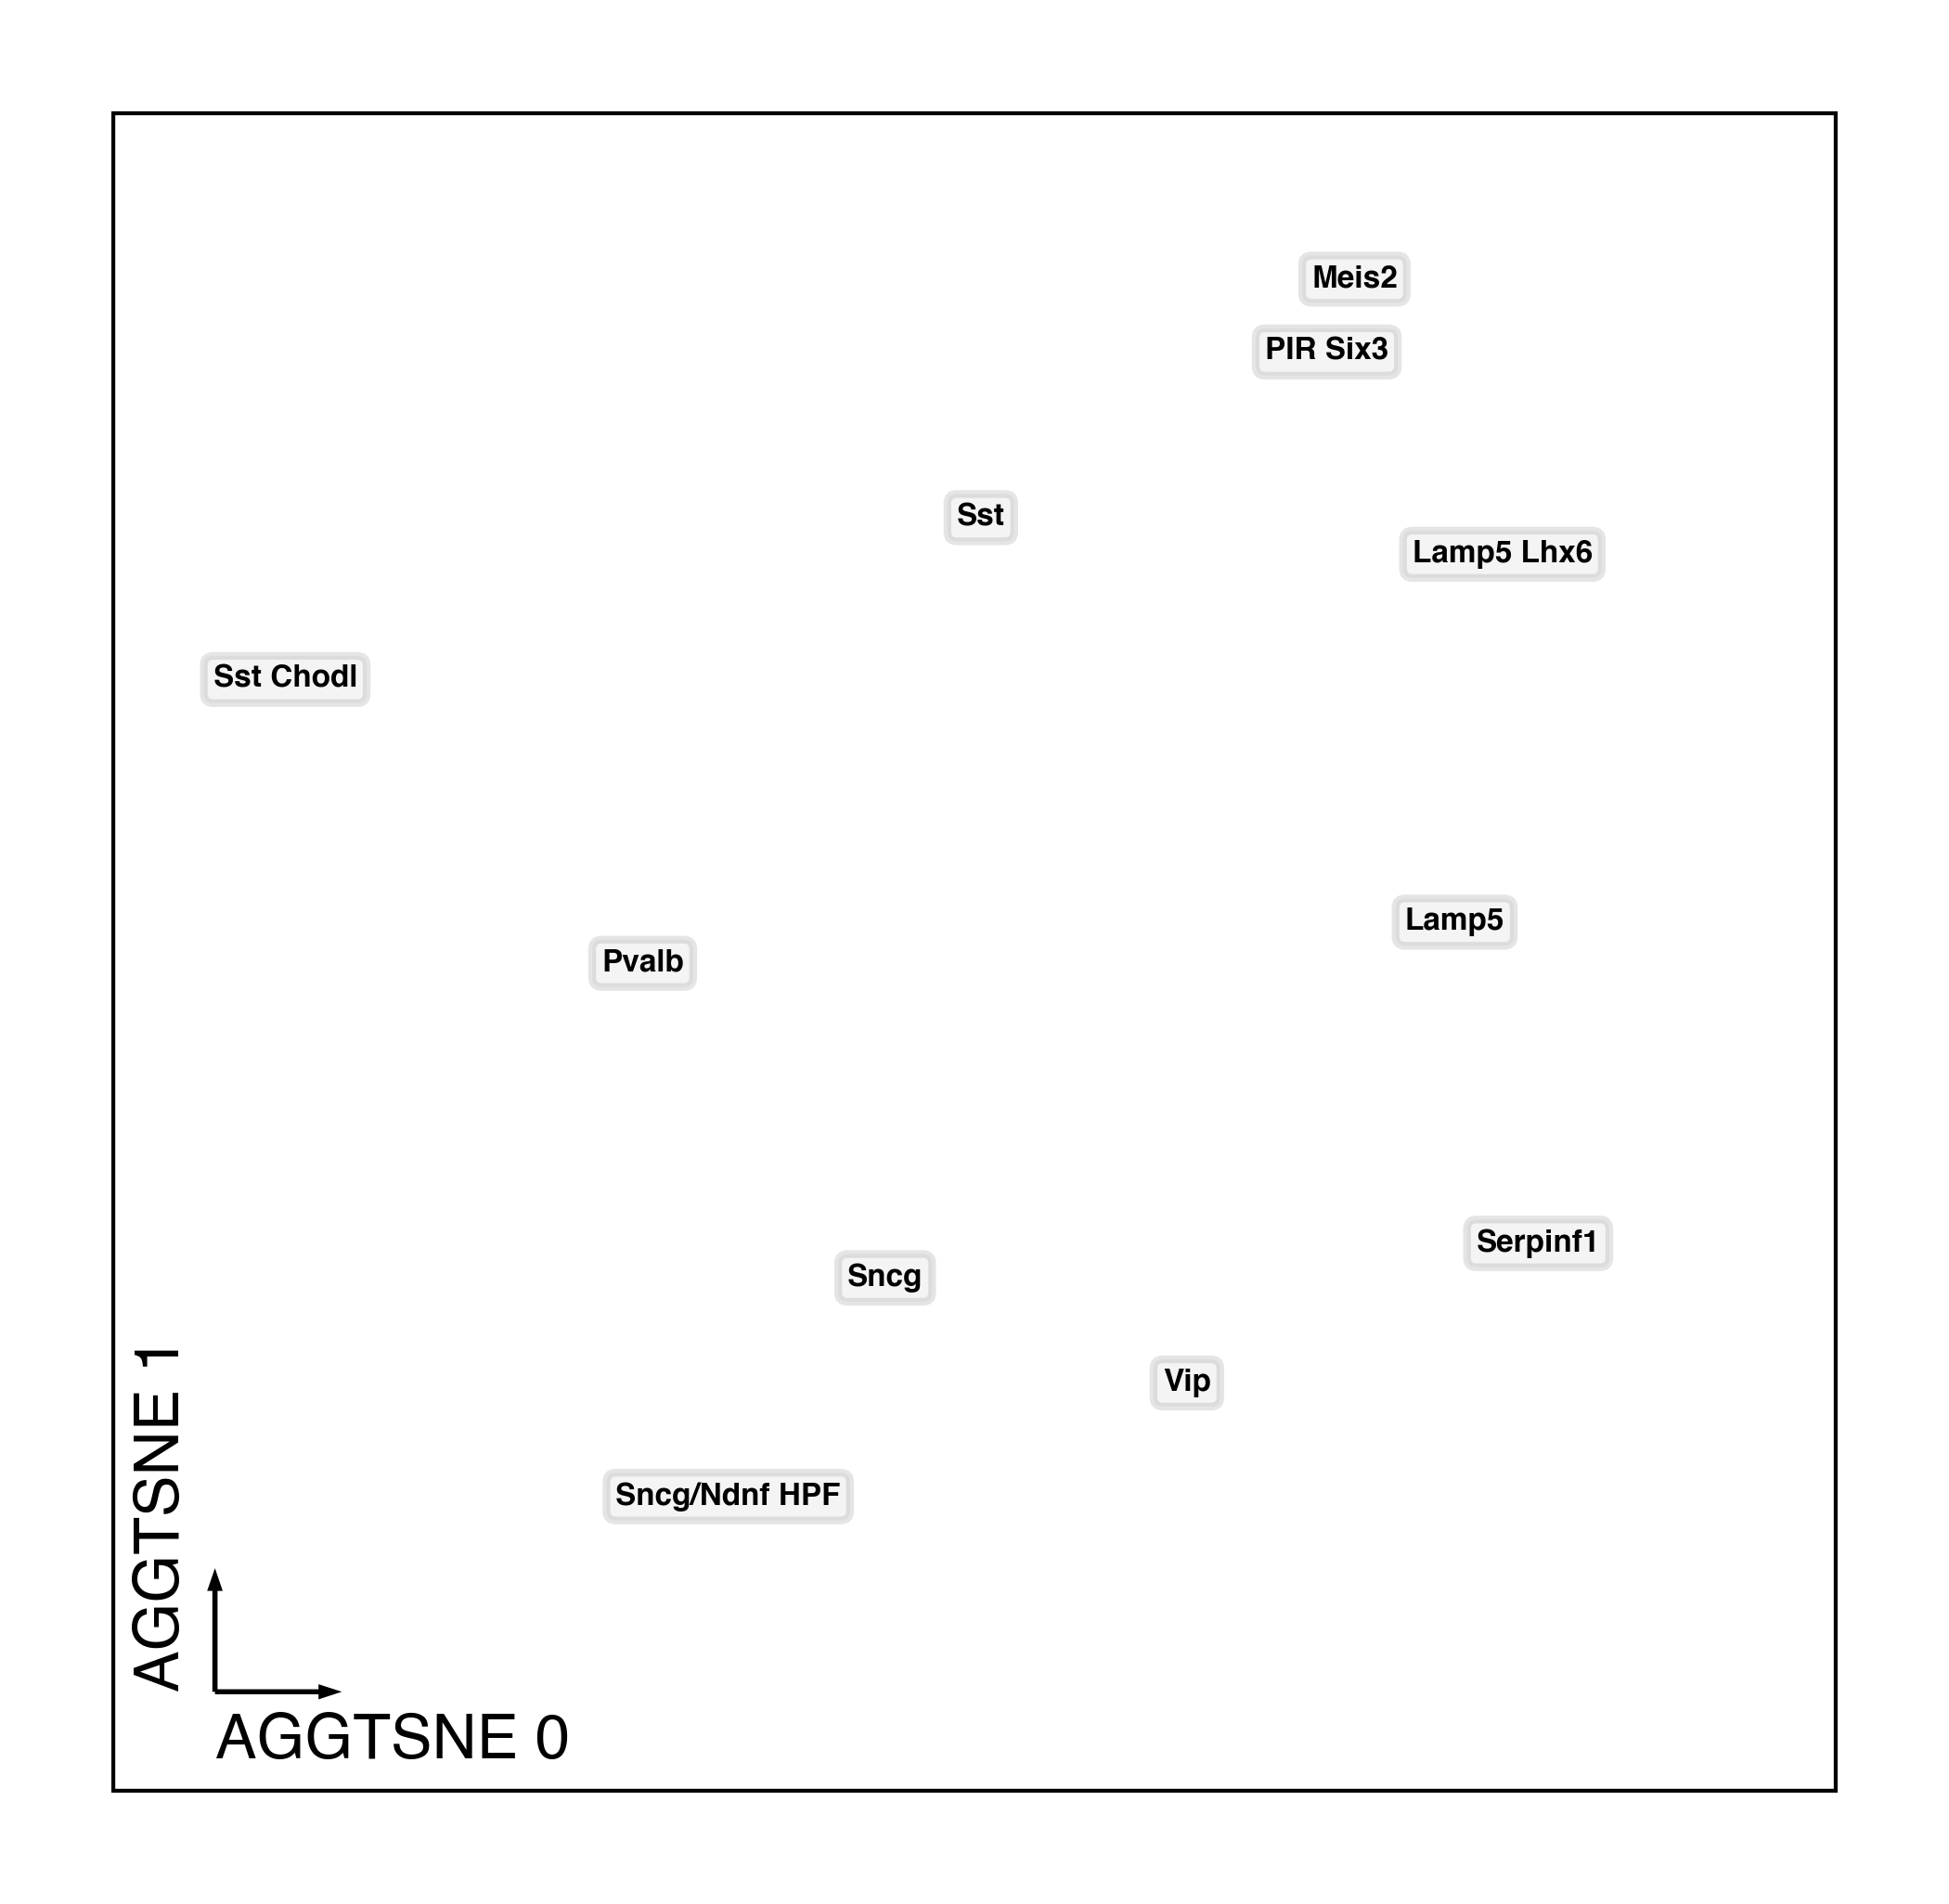

In [32]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=rna_integration_data,
                    coord_base='aggtsne',
                    s=0.8,
                    # axis_format=None,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig('TSNE-Inh-Integration.RNA.color_by_subtype.label_part.pdf')
pass